In [2]:
!pip install osmnx
!pip install networkx
!pip install geopandas
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.9/102.9 kB 2.4 MB/s eta 0:00:00


In [3]:
import osmnx as ox
import geopy.distance
import heapq
import time
import queue
import random
from  collections import deque

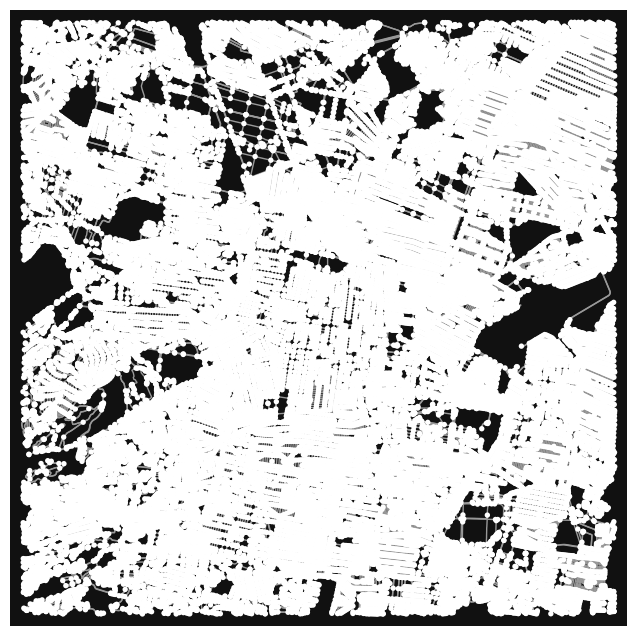

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:

 G = ox.graph_from_address('Palacio de Bellas Artes, Cuauhtémoc, Ciudad de México, 06050, México', dist=10000, network_type='drive')
 ox.plot_graph(G)


Algoritmo BFS

In [5]:
def bfs(graph, orig_node, dest_node):
    if orig_node not in graph or dest_node not in graph:
        return []
    explored, queue = set(), [(orig_node, [orig_node])]
    while queue:
        node, path = queue.pop(0)
        if node == dest_node:
            return path
        if node not in explored:
            explored.add(node)
            for neighbor in graph.neighbors(node):
                queue.append((neighbor, path + [neighbor]))
    return []

Algoritmo DFS

In [6]:
def dfs(graph, orig_node, dest_node):
    stack = [(orig_node, [orig_node])]
    visited = set()

    while stack:
        node, path = stack.pop()

        if node == dest_node:
            return path

        if node not in visited:
            visited.add(node)
            for neighbor in graph.neighbors(node):
                stack.append((neighbor, path + [neighbor]))

    return []

In [7]:
def uniform_cost_search(graph, orig_node, dest_node):
    if orig_node not in graph or dest_node not in graph:
        return []

    priority_queue = queue.PriorityQueue()
    priority_queue.put((0, orig_node, [orig_node]))

    while not priority_queue.empty():
        cost, node, path = priority_queue.get()

        if node == dest_node:
            return path

        for neighbor in graph.neighbors(node):
            if neighbor not in path:
                total_cost = cost + graph[node][neighbor].get('length', 1)
                priority_queue.put((total_cost, neighbor, path + [neighbor]))

    return []

 Algoritmo A*

In [1]:
def euclidean_distance_heuristic(orig_node, dest_node):
    coord1 = G.nodes[orig_node]['y'], G.nodes[orig_node]['x']
    coord2 = G.nodes[dest_node]['y'], G.nodes[dest_node]['x']
    return geopy.distance.distance(coord1, coord2).m

def a_star_search(graph, orig_node, dest_node):
    if orig_node not in graph or dest_node not in graph:
        return []
    frontier = [(0, orig_node, [])]
    explored = set()
    while frontier:
        cost, node, path = heapq.heappop(frontier)
        if node == dest_node:
            return path + [node]
        if node in explored:
            continue
        explored.add(node)
        for neighbor in graph.neighbors(node):
            if neighbor not in explored:
                total_cost = cost + graph[node][neighbor].get('length', 1)
                heapq.heappush(frontier, (total_cost + euclidean_distance_heuristic(neighbor, dest_node), neighbor, path + [node]))
    return []


Algoritmo IDA*

In [8]:
def ida_star(graph, node, dest_node, path, g, bound, depth ):
    if depth > 50:
        return float('inf')
    if node not in graph:
        return float('inf')
    f = g + euclidean_distance_heuristic(node, dest_node)
    if f > bound:
        return f
    if node == dest_node:
        return path + [node]
    min_bound = float('inf')
    for neighbor in graph.neighbors(node):
        if neighbor not in path:
            path.append(neighbor)
            t = ida_star(graph, neighbor, dest_node, path, g + graph[node][neighbor].get('length', 1), bound, depth + 1 )
            if isinstance(t, list):
                return t
            if t < min_bound:
                min_bound = t
            path.pop()
    return min_bound

def ida_star_search(graph, orig_node, dest_node ):
    if orig_node not in graph or dest_node not in graph:
        return []

    bound = euclidean_distance_heuristic(orig_node, dest_node)
    path = [orig_node]

    while True:
        t = ida_star(graph, orig_node, dest_node, path, 0, bound, 0 )
        if isinstance(t, list):
            return t
        if t == float('inf'):
            return []
        bound = t

Pareja 1

In [ ]:
import timeit

nodes = list(G.nodes)
node_pairs = []

while len(node_pairs) < 5:
    n1, n2 = random.sample(nodes, 2)
    if euclidean_distance_heuristic(n1, n2) < 1000:
        node_pairs.append((n1, n2))

for orig_node, dest_node in node_pairs:
    print(f"\nFrom {orig_node} to {dest_node}")

    # Prueba cada algoritmo de búsqueda y mide el tiempo de ejecución
    bfs_time = timeit.timeit(lambda: bfs(G, orig_node, dest_node), number=1)
    bfs_route = bfs(G, orig_node, dest_node)
    print("\n-------------BFS-------------")
    print(bfs_route)
    print("Tiempo: ")
    print(bfs_time)

    dfs_time = timeit.timeit(lambda: dfs(G, orig_node, dest_node), number=1)
    dfs_route = dfs(G, orig_node, dest_node)
    print("\n-------------DFS-------------")
    print(dfs_route)
    print("Tiempo: ")
    print(dfs_time)

    ucs_time = timeit.timeit(lambda: uniform_cost_search(G, orig_node, dest_node), number=1)
    ucs_route = uniform_cost_search(G, orig_node, dest_node)
    print("\n-------------UCS-------------")
    print(ucs_route)
    print("Tiempo: ")
    print(ucs_time)

    a_time = timeit.timeit(lambda: a_star_search(G, orig_node, dest_node), number=1)
    a_route = a_star_search(G, orig_node, dest_node)
    print("\n-------------A*-------------")
    print(a_route)
    print("Tiempo: ")
    print(a_time)

    ida_time = timeit.timeit(lambda: ida_star_search(G, orig_node, dest_node ), number=1)
    ida_route = ida_star_search(G, orig_node, dest_node  )
    print("\n-------------IDA*-------------")
    print(ida_route)
    print("Tiempo: ")
    print(ida_time)



From 277254013 to 387469630

-------------BFS-------------
[277254013, 277254015, 387474240, 387474238, 387474234, 387474236, 387469631, 387469630]
Tiempo: 
6.46789999336761e-05

-------------DFS-------------
[277254013, 277254015, 387474240, 387474238, 387474234, 387474236, 387469631, 387474219, 387469636, 387474208, 387474212, 8233210251, 2309053886, 387474213, 387474210, 387469641, 387474220, 387474225, 387469640, 387469638, 387474226, 387474221, 5951658071, 5951658074, 5951658073, 5951659429, 5951664810, 387474211, 387474214, 5951664812, 5951659430, 2309053884, 5951664811, 387474222, 277241756, 277241501, 277246222, 277246226, 277246545, 277246542, 277246544, 277241502, 277246731, 277246643, 277240909, 277246802, 277247063, 5936994929, 5937002391, 2309426382, 2309426383, 387471325, 387471324, 6146249197, 387472204, 387472208, 277248905, 277248904, 277249734, 5936929177, 6146249190, 277248901, 6146249203, 277245377, 277248547, 277248993, 6146249196, 5936916238, 277249072, 593692917